# Introduction

In 2022, over 100 million songs were uploaded to Spotify, almost 50,000 every single day. By October of 2022, this number was reported to have increased to almost 100,000 songs per day. Yet despite the saturation of the market, some artists and songs still manage to perform exceedlingly better than others. The Weekend's "Blinding Lights" with over 3.5 billion streams and Ed Sheeran's "Shape of You" with over 3.4 billion streams come to mind. But what sets these songs apart from the other  50,000 songs uploaded daily? This project explores the factors that contribute to the perfomance of a song on Spotify. We want to know which factors contribute the most to a song's ranking on Spotify. To that end, we will cycle through the entire data science life cycle from data collection, cleaning, analysis to machine learning and interpretation. 



## Why Is This Important?



Spotify is the most-used music streaming service with a market share of 31% (https://www.forbes.com/sites/eamonnforde/2022/01/19/spotify-comfortably-remains-the-biggest-streaming-service-despite-its-market-share-being-eaten-into/). With an increasingly saturated music market, and over 515 million monthly users, Spotify is an incredibly important platform for musicians to share their work. Consequentially, it will be paramount for musicians  to leverage whatever variables they can in order to stand out in this sea of uploads. Artists whose song have higher rankings maximize their earning potential on the platform. For example, Ed Sheeran's "Shape of You" earned over 6 million dollars as a result of its high ranking on Spotify ( see https://edm.com/industry/spotify-highest-earning-artists). Not optimizing for ranking could potentially mean leaving money on the table, for artists who are trying to make a living from music.  Besides the financial implications, artists can also increase their personal sense of creative fulfilment by reaching as wide an audience as possible. This is another incentive to understand exactly what factors make a song rise to the top of the Spotify charts. 



This research could potentially be important for Spotify as well given that hosting millions of songs each year might not always be sustainable. That there’s a rising cost associated with housing millions of tracks anually coupled with the fact that Spotify as a business has not generated any profit since its inception implies a great financial incentive for spotify to understand which songs will perfrom better, and consequetially generate more revenue. With this information, Spotify could potentially filter songs uploaded, and only hosts songs predicted to perform well on the platform. 



## More Resources

To learn more about about Spotify's business model and why they have operated at a net loss as well as the cost of hosting so much music, visit: https://www.concordiabusinessreview.com/post/why-is-spotify-not-generating-any-profit and https://www.rollingstone.com/pro/features/spotify-now-hosts-70-million-songs-but-it-cant-keep-that-up-forever-1094234/



To dive further into Spotify's growth in monthly uploads, visit: https://www.musicbusinessworldwide.com/over-60000-tracks-are-now-uploaded-to-spotify-daily-thats-nearly-one-per-second/





## Hypothesis
We will seek to identify the factors that most contribute to the ranking of a song on Spotify by looking through the Spotify Weekly Top 200 Songs Streaming Dataset. The independent variables we will analyze include the artist, song duration, liveness, valence, energy, loudness, tempo, danceability, number of streams, country and language. Our dependent variable will be a songs peak ranking

For an explanation of what each independent variable means and how it is calculated, visit: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

#### Our null hypothesis is there is no relationship between any of these factors and a song's peak ranking. 




# Part One: Data Collection
To begin, we gather our data using Python. We will be retrieving the data from the list of datasets avilable on Kaggle.com. Specifically, we will be 
looking at the Spotify Weekly Top 200 Songs dataset https://www.kaggle.com/datasets/yelexa/spotify200. This is a dataset of the top 200 songs on Spotify from 73 different countries  every week from April 14, 2022 till May 5, 2022. First we import the necesary Python libraries to begin

In [283]:
# standard Python libraries for data science
import numpy as np
import pandas as pd
import sklearn
import datetime
from sklearn import linear_model

# Python libraries for data visualization
import matplotlib.pyplot as plt
import statsmodels.api
import statsmodels.formula.api as sm
import seaborn



Next, we download the dataset and read it as a dataframe.

In [284]:
# Import final.csv into a dataframe called final_df
weekly200_df = pd.read_csv('final.csv')



/tmp/ipykernel_9003/1143093903.py:2: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  weekly200_df = pd.read_csv('final.csv')


# Part Two: Data Cleaning
After collecting the data, we now move on to cleaning it up, making sure each column is correctly formated, dropping unneeded columns and handling any 
missing values.

In [285]:
# First we drop unneeded columns and keep only the columns which we want to analyze. 
weekly200_df = weekly200_df.drop(['Unnamed: 0', 'acousticness', 'speechiness', 'artist_id', 'collab', 'instrumentalness', 'artist_img', 'album_num_tracks', 'album_cover', 'mode', 'source','pivot', 'key'], axis=1)

In [286]:
# Next we reformat dates to datetime objects
weekly200_df['week'] = pd.to_datetime(weekly200_df['week'], errors='coerce', format='%Y-%m-%d')
weekly200_df['release_date'] = pd.to_datetime(weekly200_df['release_date'], errors='coerce', format='%Y-%m-%d')




Currently, we have over a million rows. This is because the data spans three weeks, from April 14 to May 5th 2022.   To further filter the data, we will group it by week. The data spans 3 weeks from April 14 to May 5 of 2022. It currently is an aggregate of each of the 73 countries's top 200 songs for all three weeks. . In order to be able to better understand this data, focus only on week one. We want to narrow our data to be more manageable so we will group it by week and analyze only the data from week one, from April 14th to April 21st. We will be left with the top 200 songs for 73 countries from April 14th to the 21st. 


In [287]:
# Select only songs that ranked within the top 200 in any of the 200 countries during week 1
mask = (weekly200_df['week'] >= '2022-04-14') & (weekly200_df['week'] < '2022-04-21')
week1 = weekly200_df.loc[mask]


Moreover, the dataset contains  lots of duplicate values. Currently, the table duplicates rows for songs that have more than one artist, creating a new row for each artist. We need to handle these duplictates. To do so, we will drop duplicate rows that have the same rank, country, uri and song name but different artist names.

In [288]:
# Next we drop duplicate rows
week1 = week1.drop_duplicates(subset=['country', 'uri', 'track_name', 'rank'])

Finally, we convert all the numeric values from strings to ints or floats. 

In [292]:
# Next we convert the numeric values to from objects to ints or floats
week1['rank'] = pd.to_numeric(week1['rank'])
week1['peak_rank'] = pd.to_numeric(week1['peak_rank'])
week1['tempo'] = pd.to_numeric(week1['tempo'])
week1['duration'] = pd.to_numeric(week1['duration'])
week1['liveness'] = pd.to_numeric(week1['liveness'])
week1['loudness'] = pd.to_numeric(week1['loudness'])
week1['energy'] = pd.to_numeric(week1['energy'])
week1['previous_rank'] = pd.to_numeric(week1['previous_rank'])
week1['danceability'] = pd.to_numeric(week1['danceability'])
week1['valence'] = pd.to_numeric(week1['valence'])
week1['streams'] = pd.to_numeric(week1['streams'])


#### This is our resulting table. It shows us 73 countries's top 200 songs for the week of April 14 - 21 2022

In [297]:
week1.head(5)

,uri,rank,artist_names,artists_num,artist_individual,artist_genre,track_name,release_date,peak_rank,previous_rank,...,danceability,energy,loudness,liveness,valence,tempo,duration,country,region,language
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Plan A,2022-03-23,1,1,...,0.583,0.834,-4.875,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,argentine indie,ARRANCARMELO,2022-04-06,2,129,...,0.654,0.354,-7.358,0.1340,0.262,81.956,183547.0,Argentina,South America,Spanish
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Chance,2022-04-06,3,59,...,0.721,0.463,-9.483,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,urbano chileno,Una Noche en Medellín,2022-01-21,5,5,...,0.870,0.548,-5.253,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,pop argentino,cuatro veinte,2022-03-24,6,9,...,0.761,0.696,-3.817,0.1010,0.501,95.066,133895.0,Argentina,South America,Spanish


#  Part 3: Exploratory data analysis 
We can begin to make more sense of the data. We can group by specific countries and see that country's individual top 200 list for week 1.
Let's see the track names for Argentina's top 200 songs.  We see that the song Plan A by Paulo Londra is Argentina's top song, and also was last week according to the previous rank 

In [321]:
argentina = week1.loc[week1['country'] == "Argentina"].sort_values(by='rank')
argentina.head(10)

,uri,rank,artist_names,artists_num,artist_individual,artist_genre,track_name,release_date,peak_rank,previous_rank,...,danceability,energy,loudness,liveness,valence,tempo,duration,country,region,language
0,spotify:track:2gpQi3hbcUAcEG8m2dlgfB,1,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Plan A,2022-03-23,1,1,...,0.583,0.834,-4.875,0.0658,0.557,173.935,178203.0,Argentina,South America,Spanish
1,spotify:track:2x8oBuYaObjqHqgGuIUZ0b,2,WOS,1.0,WOS,argentine indie,ARRANCARMELO,2022-04-06,2,129,...,0.654,0.354,-7.358,0.1340,0.262,81.956,183547.0,Argentina,South America,Spanish
2,spotify:track:2SJZdZ5DLtlRosJ2xHJJJa,3,Paulo Londra,1.0,Paulo Londra,argentine hip hop,Chance,2022-04-06,3,59,...,0.721,0.463,-9.483,0.0929,0.216,137.915,204003.0,Argentina,South America,Spanish
6699,spotify:track:6bQ5823aHmFVKLZW8E7rRo,4,"Duki, De La Ghetto, Quevedo",3.0,Duki,trap argentino,Si Quieren Frontear,2022-03-31,4,4,...,0.789,0.837,-3.247,0.2090,0.476,81.536,200337.0,Argentina,South America,Spanish
3,spotify:track:1O2pcBJGej0pmH2Y9XZMs6,5,Cris Mj,1.0,Cris Mj,urbano chileno,Una Noche en Medellín,2022-01-21,5,5,...,0.870,0.548,-5.253,0.0534,0.832,96.018,153750.0,Argentina,South America,Spanish
4,spotify:track:1TpZKxGnHp37ohJRszTSiq,6,Emilia,1.0,Emilia,pop argentino,cuatro veinte,2022-03-24,6,9,...,0.761,0.696,-3.817,0.1010,0.501,95.066,133895.0,Argentina,South America,Spanish
6702,spotify:track:1uK5rDY3BnikyG0sl3tPpc,7,"Sofía Reyes, Maria Becerra",2.0,Sofía Reyes,latin,Marte,2022-02-10,2,2,...,0.704,0.604,-5.254,0.1260,0.642,90.028,218801.0,Argentina,South America,Spanish
6704,spotify:track:6mmPpaltUZK7xjNlBPQQ0p,8,"Rauw Alejandro, Chencho Corleone",2.0,Rauw Alejandro,puerto rican pop,Desesperados,2021-12-10,1,3,...,0.869,0.694,-3.350,0.0878,0.511,90.020,224997.0,Argentina,South America,Spanish
6706,spotify:track:6LBpjWMfy1NUfyxAJbcMRs,9,"La K'onga, Nahuel Pennisi",2.0,La K'onga,cuarteto,Universo Paralelo,2021-12-09,2,7,...,0.619,0.739,-5.743,0.2850,0.672,149.975,217072.0,Argentina,South America,Spanish
6708,spotify:track:2Gq636OOGgxCTqEuzCZhsa,10,"Bizarrap, Tiago PZK",2.0,Bizarrap,argentine hip hop,"Tiago PZK: Bzrp Music Sessions, Vol. 48",2021-12-29,1,8,...,0.656,0.823,-3.059,0.1030,0.755,96.474,160000.0,Argentina,South America,Spanish


<function matplotlib.pyplot.show(close=None, block=None)>

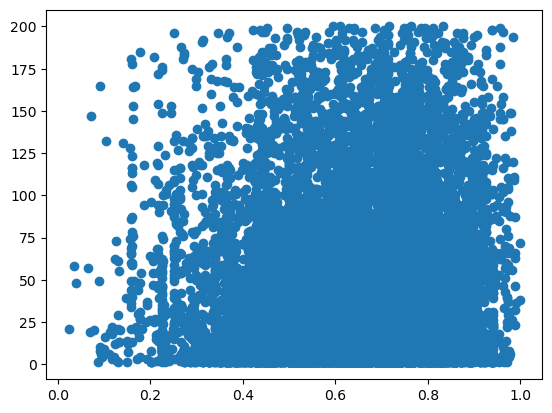

In [327]:
plt.scatter(week1.energy, week1.peak_rank)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

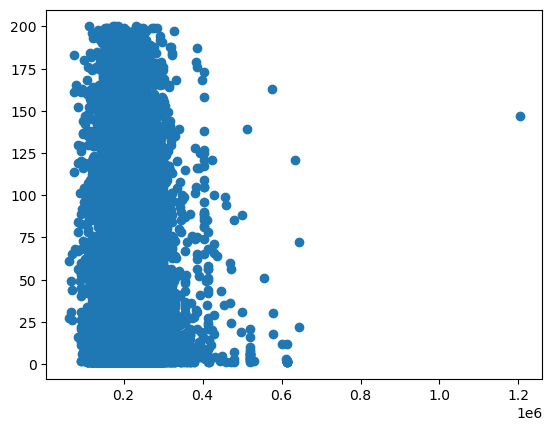

In [326]:
plt.scatter(week1.duration, week1.peak_rank)
plt.show